# Principal Component Analysis (PCA)

✅간략한 설명
* 데이터의 분산을 최대한 보존하면서 서로 직교하는 새 축을 찾아, 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 기법 
* 기존 변수를 선형 결합(linear combination)해 새로운 변수를 만들어 냄 
<br/> 

✅장점
* 고차원의 데이터를 손실을 최소화하여 효율적으로 축소 가능 
* 공분산 행렬의 고유벡터를 사용하므로 단일 가우시안 분포로 추정할 수 있는 데이터에 대해서 서로 독립적인 축을 찾는데 사용할 수 있음 
<br/>

✅한계점
* 데이터의 분포가 가우시안이 아니거나 다중 가우시안인 자료들에 대해서는 적용하기 어려움 

**자세한 설명은 [README](https://github.com/Moonmoonji/Business_Analytics-2022-/blob/main/Dimensionality_Reduction/README.md)에 나와있습니다** 👌 

✅튜토리얼 구성 
<br/> 

1. [Data 표현](#data-example)
2. [PCA Scratch 해보기](#pca-scratch) 
    - [Step 1 : 데이터 정규화](#step-1--데이터-정규화)
    - [Step 2 : Covariange Matrix 구하기](#step-2--covariance-matrix-구하기)
    - [Step 3 : Eigenstuff 구하기](#step-3--eigenstuff-eigenvector-eivenvalue-구하기)
    - [Step 4 : Eigenvalue 큰 순서대로 정렬](#step-4--eigenvalue-큰-순서대로-정렬)
    - [Step 5 : Principal Component 선택](#step-5--principal-component-선택)
3. [Explained Variance 확인](#explained-variance-확인)
4. [Scikit-Learn으로 구현](#scikit-learn으로-구현)

### Data 표현

🔎 사용할 데이터 : load_breast_cancer(위스콘신 유방함 환자 데이터)

In [4]:
# data import 
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
X = cancer['data']
y = cancer['target'] 

n_samples , n_features = X.shape

print('Number of samples: ', n_samples)
print('Numver of features: ', n_features) 

Number of samples:  569
Numver of features:  30


### PCA Scratch 

#### Step 1 : 데이터 정규화

In [11]:
# 데이터 정규화 함수 : 평균 
def mean(x) : 
    return sum(x)/len(x)

# 데이터 정규화 함수 : 표준편자 
def std(x):
    return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

# 데이터 정규화 함수 : Standard Scaler 
def Standardize_data(X):
    return (X - mean(X))/std(X)

#데이터 정규화
X_std = Standardize_data(X)

X_std

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

#### Step 2 : Covariance matrix 구하기

In [12]:
# Covariace matrix 구하는 함수 
def covariance(x) : 
    return (x.T @ x)/(x.shape[0]-1) 

cov_mat = covariance(X_std)

cov_mat

array([[ 1.00176056e+00,  3.24351929e-01,  9.99612069e-01,
         9.89095475e-01,  1.70881506e-01,  5.07014640e-01,
         6.77955036e-01,  8.23976636e-01,  1.48001350e-01,
        -3.12179472e-01,  6.80285970e-01, -9.74887767e-02,
         6.75358538e-01,  7.37159198e-01, -2.22992026e-01,
         2.06362656e-01,  1.94545531e-01,  3.76831225e-01,
        -1.04504545e-01, -4.27163418e-02,  9.71245907e-01,
         2.97530545e-01,  9.66835698e-01,  9.42739295e-01,
         1.19826732e-01,  4.14190751e-01,  5.27839123e-01,
         7.45524434e-01,  1.64241985e-01,  7.07832563e-03],
       [ 3.24351929e-01,  1.00176056e+00,  3.30113223e-01,
         3.21650988e-01, -2.34296930e-02,  2.37118951e-01,
         3.02950254e-01,  2.93980713e-01,  7.15266864e-02,
        -7.65717560e-02,  2.76354360e-01,  3.87037830e-01,
         2.82169018e-01,  2.60302460e-01,  6.62542133e-03,
         1.92312595e-01,  1.43545353e-01,  1.64139495e-01,
         9.14323671e-03,  5.45533955e-02,  3.53193674e-

#### Step 3 : Eigenstuff (Eigenvector, Eivenvalue) 구하기

In [21]:
from numpy.linalg import eig 
import numpy as np 

# Covariance Matrix의 eigenvalue, eigenvector 구하기 
eig_vals, eig_vecs = eig(cov_mat)

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02]
Eigenvectors 
 [[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02 -5.11187749e-02  1.50583883e-01
  -2.02924255e-01 -1.46712338e-01 -2.25384659e-01 -7.02414091e-01
   2.11460455e-01 -2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.03724578e-

#### Step 4 : Eigenvalue 큰 순서대로 정렬 

In [45]:
# eigenvalue랑 eignvector 내림차순(descending)으로 정렬하기
sorted_index = np.argsort(eig_vals)[::-1]

sorted_eigenvalue = eig_vals[sorted_index]
sorted_eignevector = eig_vecs[:,sorted_index]

#### Step 5 : Principal Component 선택 

In [47]:
# 주성분 개수 선택 
n_components = 5 

# 상위 n_components 만큼의 주성분 선택 
eigenvector_subset = sorted_eignevector[:,0:n_components]

# 데이터 transform 
X_reduced = np.dot(eigenvector_subset.transpose(),X_std.transpose()).transpose()

# 변형된 데이터의 shape확인
print(X_reduced.shape)

(569, 5)


### Explained Variance 확인 

💡 **Explained Variance Ratio**는 각각의 주성분 베터가 이루는 축에 투영한 결과의 분산의 비율을 말하며, 각 eigenvalue의 비율과 같은 의미임 
<br/>

$$ \frac{\lambda_i}{\lambda_1 + \lambda_2 +\lambda_3 + ... + \lambda_n} $$


Explained variance: [4.427e+01 1.897e+01 9.390e+00 6.600e+00 5.500e+00 4.020e+00 2.250e+00
 1.590e+00 1.390e+00 1.170e+00 9.800e-01 8.700e-01 8.000e-01 5.200e-01
 3.100e-01 2.700e-01 2.000e-01 1.800e-01 1.600e-01 1.000e-01 1.000e-01
 9.000e-02 8.000e-02 6.000e-02 5.000e-02 3.000e-02 2.000e-02 1.000e-02
 0.000e+00 0.000e+00]
Cumulative explained variance: [44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59 93.98 95.15 96.13 97.
 97.8  98.32 98.63 98.9  99.1  99.28 99.44 99.54 99.64 99.73 99.81 99.87
 99.92 99.95 99.97 99.98 99.98 99.98]


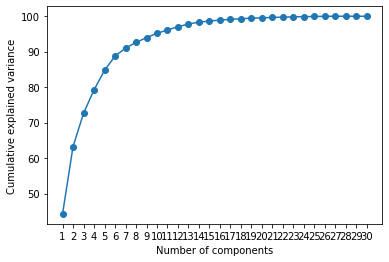

In [48]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in sorted_eigenvalue]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

import matplotlib.pyplot as plt

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

🔎 Explained Variance Ratio 해석 
<br/>

기존 변수 30개에서 5개로 차원을 축소했을 때 변수 설명력이 84.73%로 차원이 많이 축소되었음에도 충분한 설명력을 가진다. 


#### Scikit-Learn으로 구현 

Components:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
Explained variance ratio:
 [0.44272026 0.18971182]
Cumulative explained variance:
 [0.44272026 0.63243208]
Transformed data shape: (569, 2)


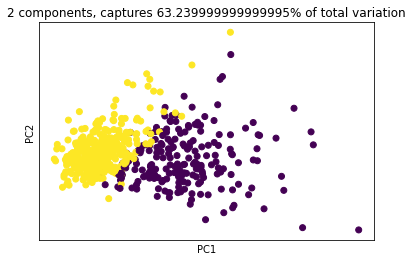

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

X_std = StandardScaler().fit_transform(X) 
pca = PCA(n_components=2).fit(X_std)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance:\n', cum_explained_variance)

X_pca = pca.transform(X_std) # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {}% of total variation'.format(cum_explained_variance[1].round(4)*100))
plt.show()